In [12]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
import time
import math

In [2]:
fitness_per_eval = []
fitness_per_iter = []

In [3]:
rastriginkdf = pd.read_csv('../data/rastrigin.csv')
f_biasdf = pd.read_csv('../data/f_bias.csv')

rastrigin = rastriginkdf.fvalue.values
f_bias = f_biasdf.fvalue.values

In [4]:
f_xstar = f_bias[3]
search_space = (-5,5)

double Shifted_Rastrigin( int dim , double* x )
{
    int i;
    double z;
    double F = 0;
    for(i=0;i<dim;i++){  
        z = x[i] - rastrigin[i];
        F = F + ( pow(z,2) - 10*cos(2*pi*z) + 10);
    }
    return F + f_bias[3]; 
}

In [15]:
@jit(nopython=True)
def frastrigin(x, dim):
    F = 0
    for i in range(dim-1):
        z = x[i]-rastrigin[i]
        F += z**2 - 10*math.cos(2*math.pi*z)+10
    
    result = F + f_xstar
  
    return result

In [6]:
def f(x,dim):
    
#     ro = 1
#     result = frosen(x,dim)
#     for i in range(dim-1):
#         if x[i] < -100:
#             result += ro * (-100 - x[i]) ** 2
#         elif x[i] > 100:
#             result += ro * (x[i] - 100) ** 2
    
    result = frastrigin(x,dim)
    fitness_per_eval.append(result-f_xstar)
    return result

In [8]:
def callback_f(xk):
    result = frastrigin(xk,D)
    fitness_per_iter.append(result-f_xstar)

In [9]:
def initial_solution(dim,bounds):
    # bounds
    xmin, xmax = bounds
    x_min = xmin * np.ones(D)
    x_max = xmax * np.ones(D)
    cur_x = np.random.uniform(min(x_min), max(x_max), (1, D))
    return cur_x

In [10]:
def optimize_minimize(dim,search_space,method,options):
    global fitness_per_eval
    global fitness_per_iter
    
    fitness_per_eval = []
    fitness_per_iter = []
    
    result=None
    cur_x = initial_solution(dim,search_space)
    t0 = time.time()
    result = optimize.minimize(f, args=(dim), x0=cur_x, method=method, options=options, callback=callback_f)
    t1 = time.time()
    return result, t1-t0

In [30]:
D = 50

method = 'L-BFGS-B'
options = {'maxiter': 100, 'gtol': 1e-5, 'disp': False}
# method = 'Nelder-Mead'
# options = {'maxiter': 20000, 'ftol': 1e-3, 'disp': False, 'adaptive':True}

result, duration = optimize_minimize(D,search_space,method,options)

In [31]:
print("Algorithm: %s" % method)
print("Parameters: %s" % options)
print("Solution: %f - Fitness: %f" % (result.fun,fitness_per_eval[-1]))
print(f_xstar)
print("Nb of functions evaluations: %d in %d iterations" % (result.nfev,result.nit))
print("Stopping criterion: %s" % result.message)
print("computanional time: %.3f seconds" % duration)

Algorithm: L-BFGS-B
Parameters: {'maxiter': 100, 'gtol': 1e-05, 'disp': False}
Solution: 420.188421 - Fitness: 750.188421
-330.0
Nb of functions evaluations: 867 in 14 iterations
Stopping criterion: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
computanional time: 0.016 seconds


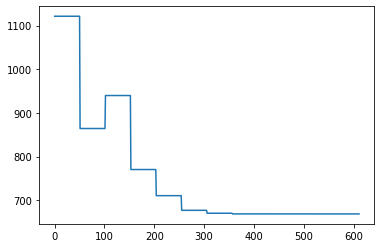

In [22]:
plt.plot(fitness_per_eval)
plt.show();

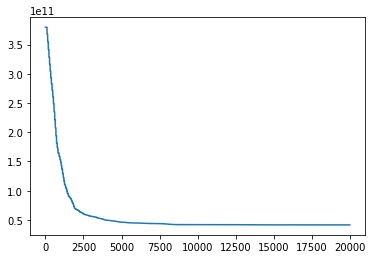

In [35]:
plt.plot(fitness_per_iter)
plt.show();

In [ ]:
D = 500

# method = 'L-BFGS-B'
# options = {'maxiter': 100, 'gtol': 1e-5, 'disp': False}
method = 'SLSQP'
options = {'maxiter': 100, 'ftol': 1e-5, 'disp': False}

result, duration = optimize_minimize(D,search_space,method,options)

In [ ]:
print("Algorithm: %s" % method)
print("Parameters: %s" % options)
print("Solution: %f - Fitness: %f" % (result.fun,fitness_per_eval[-1]))
print("Nb of functions evaluations: %d in %d iterations" % (result.nfev,result.nit))
print("Stopping criterion: %s" % result.message)
print("computanional time: %.3f seconds" % duration)

In [ ]:
plt.plot(fitness_per_eval)
plt.show();

In [ ]:
plt.plot(fitness_per_iter)
plt.show();